In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import loadtxt
from xgboost import  XGBClassifier
from xgboost import plot_importance
import xgboost
from sklearn import metrics
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')
    
pd.set_option('display.expand_frame_repr', False)
import warnings
warnings.filterwarnings(action='ignore')

# Selection


In [2]:
final_dataset = pd.read_excel('./true.xlsx')

col = ['종가 (5일 평균)(원)_1일변화율',
       '변동성 (5일)_1일변화율', '순매수수량(외국인계)(20일합산)(주)_1일변화율', 'PER(IFRS-연결)_1일변화율',
       '순매수수량(개인)(20일합산)(주)_1일변화율', '종가 (60일 평균)(원)_1일변화율',
       '거래량 (20일 평균)(주)_1일변화율', '순매수수량(외국인계)(60일합산)(주)_1일변화율',
       '순매수수량(기관/외국인계)(60일합산)(주)_1일변화율', '순매수수량(외국인계)(주)_1일변화율',
       '순매수수량(기관계)(주)_1일변화율', '순매수수량(기관계)(60일합산)(주)_1일변화율',
       '순매수수량(개인)(주)_1일변화율', '외국인보유비중(티커)(%)_1일변화율', 'PSR(IFRS-연결)_1일변화율',
       '종가 (120일 평균)(원)_1일변화율', '종가 (20일 평균)(원)_1일변화율',
       '순매수수량(개인)(60일합산)(주)_1일변화율', '거래량 (60일 평균)(주)_1일변화율',
       'PCR(IFRS-연결)_1일변화율', '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율',
       '순매수수량(기관계)(20일합산)(주)_1일변화율', '수익률 (1주)(%)_1일변화율', 'PBR(IFRS-연결)_1일변화율',
       '거래량 (5일 평균)(주)_1일변화율', '순매수수량(기관/외국인계)(주)_1일변화율',
       '종가 (5일 평균)(원)_2일변화율', '변동성 (5일)_2일변화율', '순매수수량(외국인계)(20일합산)(주)_2일변화율',
       'PER(IFRS-연결)_2일변화율', '순매수수량(개인)(20일합산)(주)_2일변화율',
       '종가 (60일 평균)(원)_2일변화율', '거래량 (20일 평균)(주)_2일변화율',
       '순매수수량(외국인계)(60일합산)(주)_2일변화율', '순매수수량(기관/외국인계)(60일합산)(주)_2일변화율',
       '순매수수량(외국인계)(주)_2일변화율', '순매수수량(기관계)(주)_2일변화율',
       '순매수수량(기관계)(60일합산)(주)_2일변화율', '순매수수량(개인)(주)_2일변화율',
       '외국인보유비중(티커)(%)_2일변화율', 'PSR(IFRS-연결)_2일변화율', '종가 (120일 평균)(원)_2일변화율',
       '종가 (20일 평균)(원)_2일변화율', '순매수수량(개인)(60일합산)(주)_2일변화율',
       '거래량 (60일 평균)(주)_2일변화율', 'PCR(IFRS-연결)_2일변화율',
       '순매수수량(기관/외국인계)(20일합산)(주)_2일변화율', '순매수수량(기관계)(20일합산)(주)_2일변화율',
       '수익률 (1주)(%)_2일변화율', 'PBR(IFRS-연결)_2일변화율', '거래량 (5일 평균)(주)_2일변화율',
       '순매수수량(기관/외국인계)(주)_2일변화율','수익률(%)(2)','Name']
data =  final_dataset[col]

*********************코웨이*********************


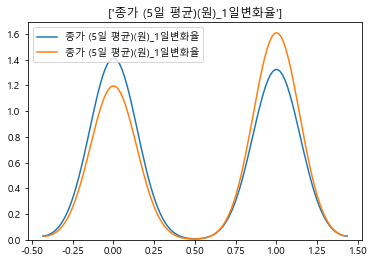

*********************코웨이*********************


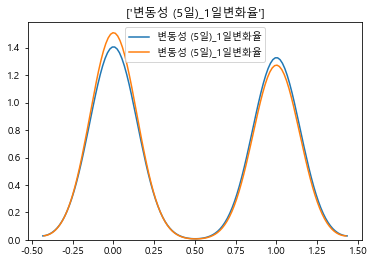

*********************코웨이*********************


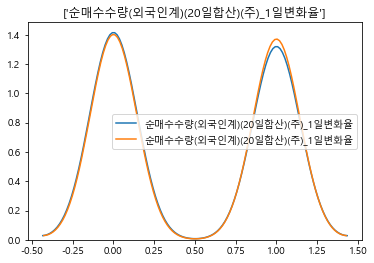

*********************코웨이*********************


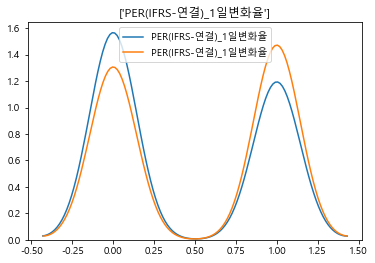

*********************코웨이*********************


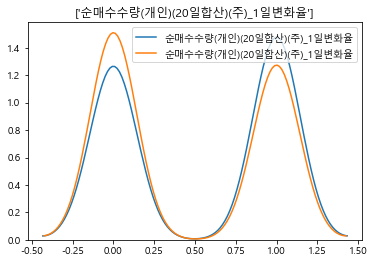

*********************코웨이*********************


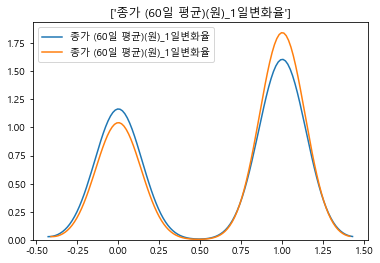

*********************코웨이*********************


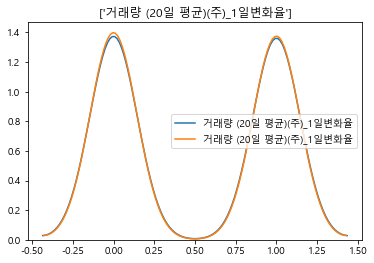

*********************코웨이*********************


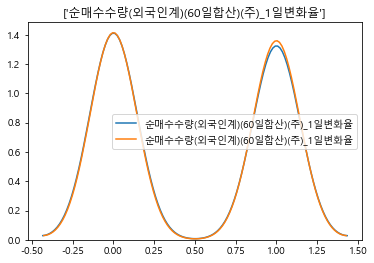

*********************코웨이*********************


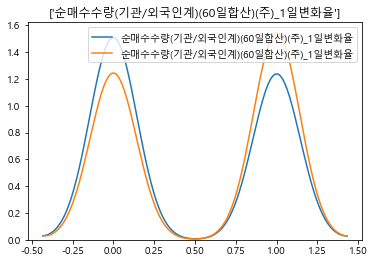

*********************코웨이*********************


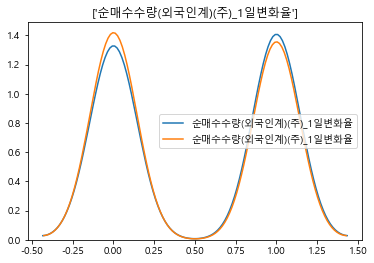

*********************코웨이*********************


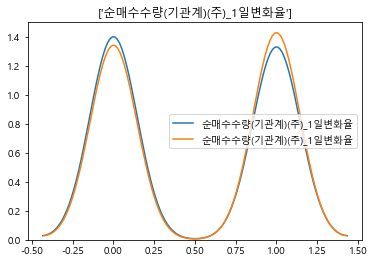

*********************코웨이*********************


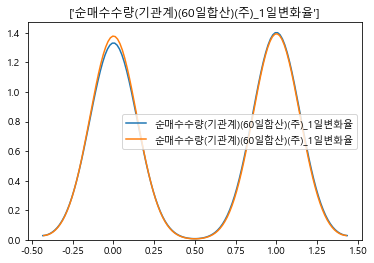

*********************코웨이*********************


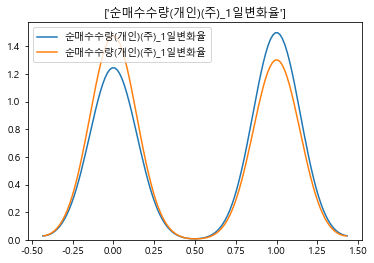

*********************코웨이*********************


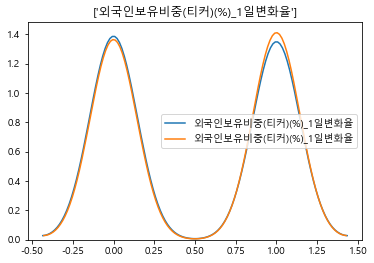

*********************코웨이*********************


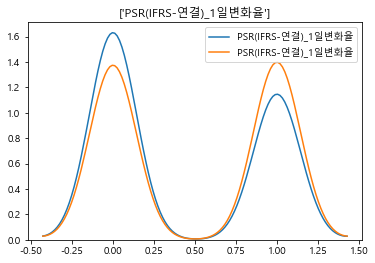

*********************코웨이*********************


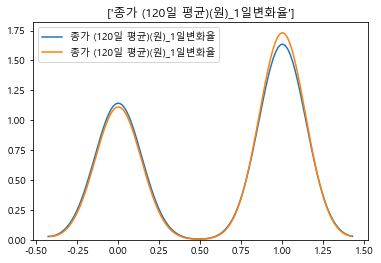

*********************코웨이*********************


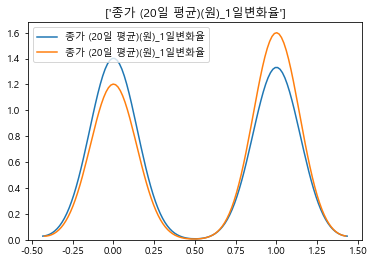

*********************코웨이*********************


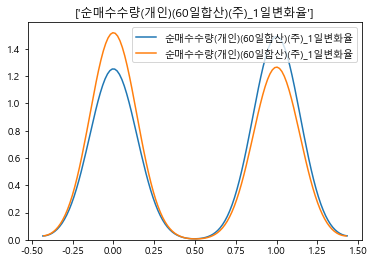

*********************코웨이*********************


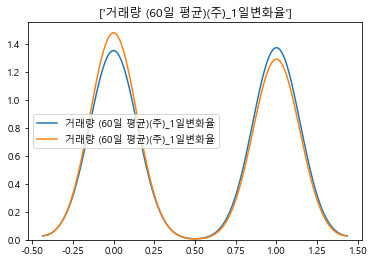

*********************코웨이*********************


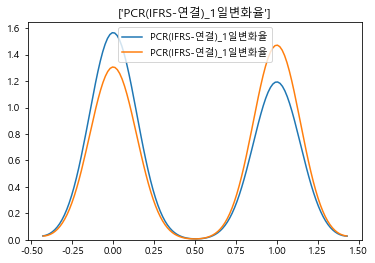

*********************코웨이*********************


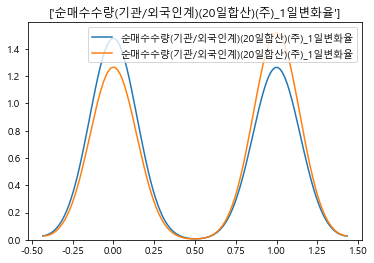

*********************코웨이*********************


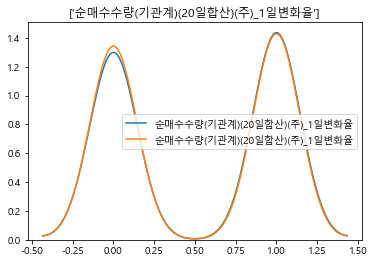

*********************코웨이*********************


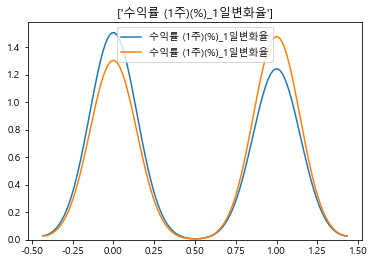

*********************코웨이*********************


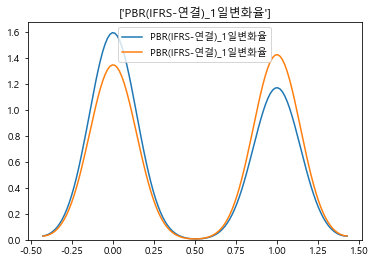

*********************코웨이*********************


*********************코웨이*********************


*********************코웨이*********************


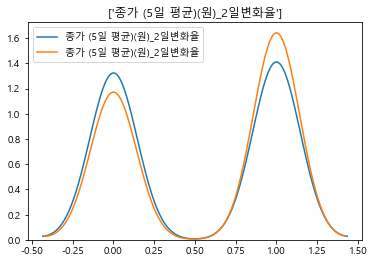

*********************코웨이*********************


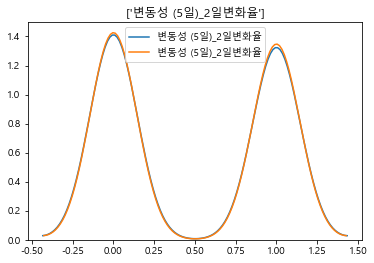

*********************코웨이*********************


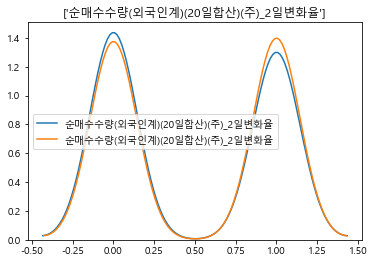

*********************코웨이*********************


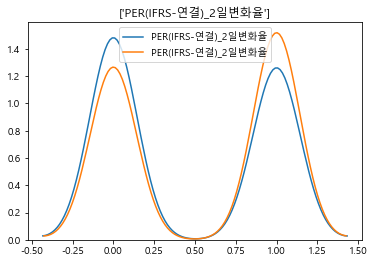

*********************코웨이*********************


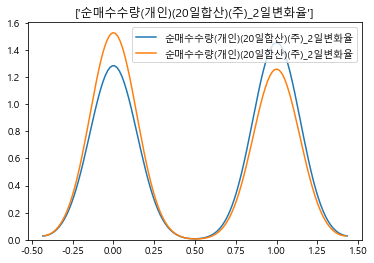

*********************코웨이*********************


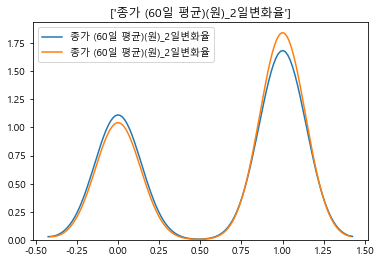

*********************코웨이*********************


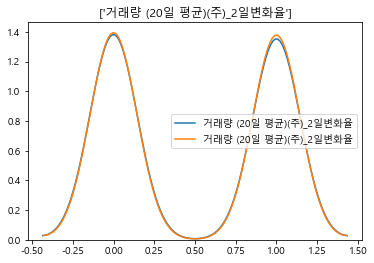

*********************코웨이*********************


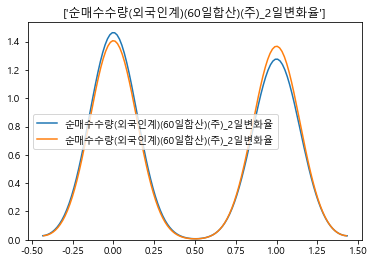

*********************코웨이*********************


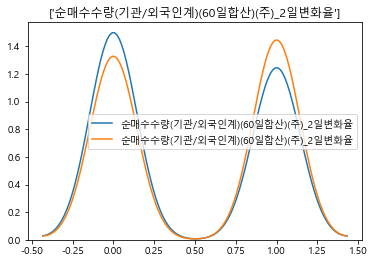

*********************코웨이*********************


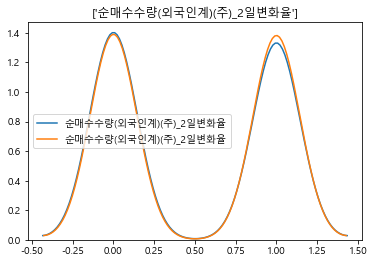

*********************코웨이*********************


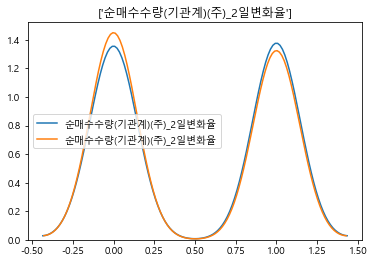

*********************코웨이*********************


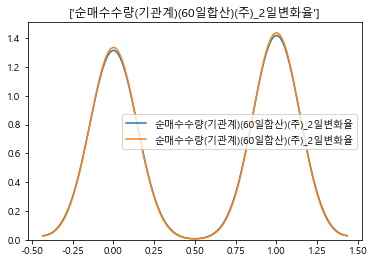

*********************코웨이*********************


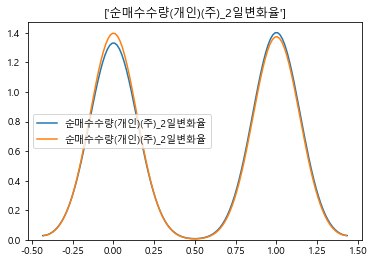

*********************코웨이*********************


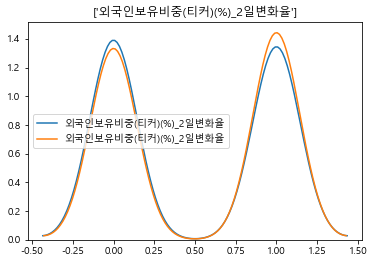

*********************코웨이*********************


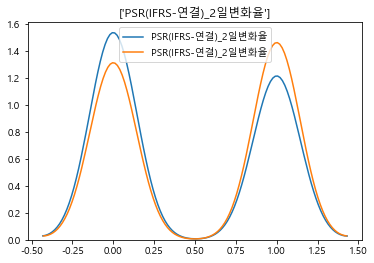

*********************코웨이*********************


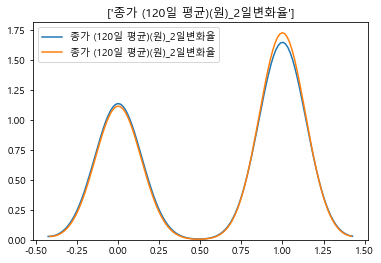

*********************코웨이*********************


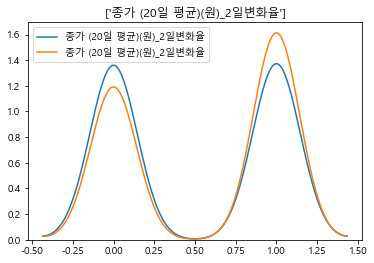

*********************코웨이*********************


*********************코웨이*********************


*********************코웨이*********************


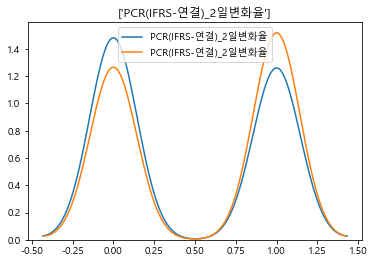

*********************코웨이*********************


*********************코웨이*********************


*********************코웨이*********************


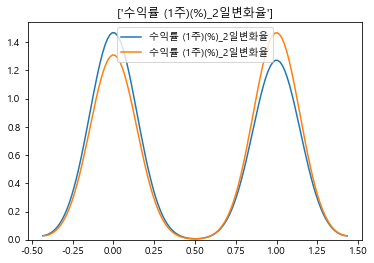

*********************코웨이*********************


*********************코웨이*********************


*********************코웨이*********************


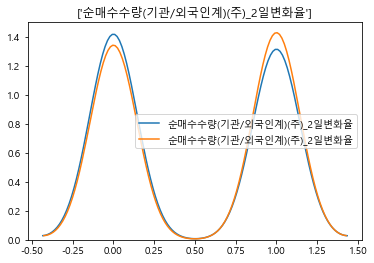

In [9]:
K='코웨이'
for i in col:
    sns.kdeplot(data=final_dataset[final_dataset['수익률(%)(2)'] == 1][i])
    sns.kdeplot(data=final_dataset[final_dataset['수익률(%)(2)'] == 0][i])
    plt.title([i])
    print('*******************s**{}*********************'.format(K))
    plt.show()

In [3]:
def data_sp(data):
    com_name_set = list(set(data.Name))
    
    train_set = pd.DataFrame()
    test_set = pd.DataFrame()
    
    for i in range(len(com_name_set)):
        sub_set = data[ data.Name == com_name_set[i]]
        train_set = train_set.append(sub_set[:-60])
        test_set = test_set.append(sub_set[-60:])
    return train_set , test_set

In [4]:
train, test = data_sp(data)

In [5]:
print(train.shape,test.shape)

(1305, 54) (60, 54)


In [41]:
test

종가 (5일 평균)(원)_1일변화율  변동성 (5일)_1일변화율  순매수수량(외국인계)(20일합산)(주)_1일변화율  PER(IFRS-연결)_1일변화율  순매수수량(개인)(20일합산)(주)_1일변화율  종가 (60일 평균)(원)_1일변화율  거래량 (20일 평균)(주)_1일변화율  순매수수량(외국인계)(60일합산)(주)_1일변화율  순매수수량(기관/외국인계)(60일합산)(주)_1일변화율  순매수수량(외국인계)(주)_1일변화율  ...   거래량 (60일 평균)(주)_2일변화율  PCR(IFRS-연결)_2일변화율  순매수수량(기관/외국인계)(20일합산)(주)_2일변화율  순매수수량(기관계)(20일합산)(주)_2일변화율  수익률 (1주)(%)_2일변화율  PBR(IFRS-연결)_2일변화율  거래량 (5일 평균)(주)_2일변화율  순매수수량(기관/외국인계)(주)_2일변화율  수익률(%)(2)  Name
2018-10-01                    1               0                            0                   0                          0                     1                      1                            1                               1                     1  ...                       1                   1                               1                           1                  0                   1                     0                        1          0   코웨이
2018-10-02                    1               1                            0                   0                          0                     1                      1                            1                               1                     0  ...                       1                   0                               1                           1                  0                   0                     0                        0          0   코웨이
2018-10-04                    0               1                            0                   0                          1                     1                      1                            0                               0                     0  ...                       1                   0                               0                           1                  0                   0                     0                        0          1   코웨이
2018-10-05                    0               1                            0                   1                          0                     0                      1                            0                               0                     1  ...                       1                   0                               0                           1                  0                   0                     0                        1          0   코웨이
2018-10-08                    0               0                            0                   0                          1                     0                      1                            0                               0                     1  ...                       0                   1                               0                           1                  1                   1                     0                        1          0   코웨이
2018-10-10                    0               0                            0                   0                          0                     0                      1                            0                               1                     0  ...                       0                   0                               1                           1                  1                   0                     0                        0          0   코웨이
2018-10-11                    0               1                            0                   0                          1                     0                      1                            0                               0                     1  ...                       1                   0                               0                           1                  0                   0                     1                        0          1   코웨이
2018-10-12                    0               0                            1                   1                          1                     0                      1                            0                               0                     0  ...                       1                   0

### 2진화한 데이터셋 분석
## xgboost

In [7]:
## 60일 결과

colsss = ['종가 (5일 평균)(원)_1일변화율',
       '변동성 (5일)_1일변화율', '순매수수량(외국인계)(20일합산)(주)_1일변화율', 'PER(IFRS-연결)_1일변화율',
       '순매수수량(개인)(20일합산)(주)_1일변화율', '종가 (60일 평균)(원)_1일변화율',
       '거래량 (20일 평균)(주)_1일변화율', '순매수수량(외국인계)(60일합산)(주)_1일변화율',
       '순매수수량(기관/외국인계)(60일합산)(주)_1일변화율', '순매수수량(외국인계)(주)_1일변화율',
       '순매수수량(기관계)(주)_1일변화율', '순매수수량(기관계)(60일합산)(주)_1일변화율',
       '순매수수량(개인)(주)_1일변화율', '외국인보유비중(티커)(%)_1일변화율', 'PSR(IFRS-연결)_1일변화율',
       '종가 (120일 평균)(원)_1일변화율', '종가 (20일 평균)(원)_1일변화율',
       '순매수수량(개인)(60일합산)(주)_1일변화율', '거래량 (60일 평균)(주)_1일변화율',
       'PCR(IFRS-연결)_1일변화율', '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율',
       '순매수수량(기관계)(20일합산)(주)_1일변화율', '수익률 (1주)(%)_1일변화율', 'PBR(IFRS-연결)_1일변화율',
       '거래량 (5일 평균)(주)_1일변화율', '순매수수량(기관/외국인계)(주)_1일변화율',
       '종가 (5일 평균)(원)_2일변화율', '변동성 (5일)_2일변화율', '순매수수량(외국인계)(20일합산)(주)_2일변화율',
       'PER(IFRS-연결)_2일변화율', '순매수수량(개인)(20일합산)(주)_2일변화율',
       '종가 (60일 평균)(원)_2일변화율', '거래량 (20일 평균)(주)_2일변화율',
       '순매수수량(외국인계)(60일합산)(주)_2일변화율', '순매수수량(기관/외국인계)(60일합산)(주)_2일변화율',
       '순매수수량(외국인계)(주)_2일변화율', '순매수수량(기관계)(주)_2일변화율',
       '순매수수량(기관계)(60일합산)(주)_2일변화율', '순매수수량(개인)(주)_2일변화율',
       '외국인보유비중(티커)(%)_2일변화율', 'PSR(IFRS-연결)_2일변화율', '종가 (120일 평균)(원)_2일변화율',
       '종가 (20일 평균)(원)_2일변화율', '순매수수량(개인)(60일합산)(주)_2일변화율',
       '거래량 (60일 평균)(주)_2일변화율', 'PCR(IFRS-연결)_2일변화율',
       '순매수수량(기관/외국인계)(20일합산)(주)_2일변화율', '순매수수량(기관계)(20일합산)(주)_2일변화율',
       '수익률 (1주)(%)_2일변화율', 'PBR(IFRS-연결)_2일변화율', '거래량 (5일 평균)(주)_2일변화율',
       '순매수수량(기관/외국인계)(주)_2일변화율']

accsets = pd.DataFrame([list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5))],
                       columns=['train_val_pro','test_pro','pre_pro','features','lenth_of_feature'])

    ## train test를 X,Y 나누기 42/
for i in range(42):
    X_train = train[colsss]
    X_test = test[colsss]

    Y_train = train['수익률(%)(2)']
    Y_test = test['수익률(%)(2)']

    model = XGBClassifier(n_estimators= 1500)
    model.fit(X_train[colsss] ,Y_train)
    a = model.predict(X_train[colsss])
    b = model.predict(X_test[colsss])
    t = metrics.confusion_matrix(Y_test,b)
    
    accsets['train_val_pro'][i] = metrics.accuracy_score(a,Y_train)
    accsets['test_pro'][i] = metrics.accuracy_score(b,Y_test)
    accsets['pre_pro'][i] = t[1,1]/t[:,1].sum()
    accsets['features'][i] = colsss
    accsets['lenth_of_feature'][i] = int(len(colsss))
    a = pd.DataFrame(colsss)[pd.DataFrame(model.feature_importances_ == min(model.feature_importances_)) == False].iloc[:,0]
    a.dropna(inplace=True, axis=0)
    colsss = list(a)
accsets


train_val_pro  test_pro   pre_pro                                           features  lenth_of_feature
0        0.954023  0.566667  0.536585  [종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...              52.0
1        0.954023  0.566667  0.536585  [종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...              50.0
2        0.949425  0.600000  0.560976  [종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...              48.0
3        0.948659  0.600000  0.560976  [종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...              47.0
4        0.953257  0.566667  0.538462  [종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...              46.0
5        0.950192  0.600000  0.564103  [종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...              45.0
6        0.949425  0.616667  0.575000  [종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...              44.0
7        0.947126  0.566667  0.540541  [종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...              43.0
8        0.944828  0.616667  0.575000  [종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...              42.0
9        0.947126  0.583333  0.555556  [종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...              41.0
10       0.943295  0.600000  0.564103  [종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...              40.0
11       0.944828  0.583333  0.552632  [종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...              39.0
12       0.946360  0.566667  0.540541  [종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...              38.0
13       0.945594  0.600000  0.564103  [종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...              37.0
14       0.937931  0.583333  0.547619  [종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...              36.0
15       0.934100  0.550000  0.525000  [종가 (5일 평균)(원)_1일변화율, 변동성 (5일)_1일변화율, 순매수수량(외국...              35.0
16       0.932567  0.566667  0.545455  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              34.0
17       0.917241  0.583333  0.552632  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              33.0
18       0.922605  0.633333  0.589744  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              32.0
19       0.914176  0.683333  0.625000  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              31.0
20       0.911877  0.700000  0.634146  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              30.0
21       0.899617  0.666667  0.615385  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              29.0
22       0.898084  0.683333  0.631579  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              28.0
23       0.886590  0.683333  0.638889  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              27.0
24       0.875862  0.616667  0.588235  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              26.0
25       0.862069  0.616667  0.593750  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              25.0
26       0.863602  0.616667  0.588235  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              24.0
27       0.845211  0.600000  0.575758  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              23.0
28       0.832184  0.633333  0.600000  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              22.0
29       0.809195  0.550000  0.531250  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              21.0
30       0.819923  0.583333  0.558824  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              20.0
31       0.798467  0.583333  0.562500  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              19.0
32       0.789272  0.700000  0.666667  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              18.0
33       0.778544  0.600000  0.580645  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              17.0
34       0.755556  0.666667  0.666667  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              16.0
35       0.744061  0.600000  0.580645  [변동성 (5일)_1일변화율, 순매수수량(외국인계)(20일합산)(주)_1일변화율, ...              15.0
36       0.737931  0.600000  0.600000  [변동성 (

In [45]:
# n_est default
accsets.iloc[28,3]

['순매수수량(외국인계)(60일합산)(주)_1일변화율',
 '순매수수량(기관/외국인계)(60일합산)(주)_1일변화율',
 '순매수수량(외국인계)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '종가 (20일 평균)(원)_1일변화율',
 '순매수수량(기관계)(20일합산)(주)_1일변화율',
 '거래량 (5일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(주)_1일변화율',
 'PER(IFRS-연결)_2일변화율',
 '종가 (60일 평균)(원)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '거래량 (60일 평균)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '거래량 (5일 평균)(주)_2일변화율']

In [14]:
# n_est 1500  0.789272	0.700000	0.666667
accsets.iloc[32,3]

['변동성 (5일)_1일변화율',
 '순매수수량(외국인계)(20일합산)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '외국인보유비중(티커)(%)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '거래량 (60일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율',
 '거래량 (5일 평균)(주)_1일변화율',
 '변동성 (5일)_2일변화율',
 '순매수수량(개인)(20일합산)(주)_2일변화율',
 '종가 (60일 평균)(원)_2일변화율',
 '거래량 (20일 평균)(주)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '외국인보유비중(티커)(%)_2일변화율',
 '순매수수량(개인)(60일합산)(주)_2일변화율',
 '순매수수량(기관계)(20일합산)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '순매수수량(기관/외국인계)(주)_2일변화율']

In [ ]:
# n_est 1500  0.755556	0.666667	0.666667
accsets.iloc[32,3]

In [47]:
## 동질성을 가지는 칼럼 파악
for i in co:
    for k in co:
        if i != k and (final_dataset[i] == final_dataset[k]).sum()/len(final_dataset)>0.7:
            print(i,k,(final_dataset[i] == final_dataset[k]).sum()/len(final_dataset))

순매수수량(외국인계)(60일합산)(주)_1일변화율 순매수수량(외국인계)(60일합산)(주)_2일변화율 0.7978021978021979
종가 (120일 평균)(원)_1일변화율 종가 (60일 평균)(원)_2일변화율 0.747985347985348
거래량 (5일 평균)(주)_1일변화율 거래량 (5일 평균)(주)_2일변화율 0.8124542124542125
PER(IFRS-연결)_2일변화율 수익률 (1주)(%)_2일변화율 0.734065934065934
종가 (60일 평균)(원)_2일변화율 종가 (120일 평균)(원)_1일변화율 0.747985347985348
순매수수량(외국인계)(60일합산)(주)_2일변화율 순매수수량(외국인계)(60일합산)(주)_1일변화율 0.7978021978021979
수익률 (1주)(%)_2일변화율 PER(IFRS-연결)_2일변화율 0.734065934065934
거래량 (5일 평균)(주)_2일변화율 거래량 (5일 평균)(주)_1일변화율 0.8124542124542125


In [8]:
colsss = ['변동성 (5일)_1일변화율',
 '순매수수량(외국인계)(20일합산)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '외국인보유비중(티커)(%)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '거래량 (60일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율',
 '거래량 (5일 평균)(주)_1일변화율',
 '변동성 (5일)_2일변화율',
 '순매수수량(개인)(20일합산)(주)_2일변화율',
 '종가 (60일 평균)(원)_2일변화율',
 '거래량 (20일 평균)(주)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '외국인보유비중(티커)(%)_2일변화율',
 '순매수수량(개인)(60일합산)(주)_2일변화율',
 '순매수수량(기관계)(20일합산)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '순매수수량(기관/외국인계)(주)_2일변화율']

X_train = train[colsss]
X_test = test[colsss]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier(n_estimators = 1500)
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.78927, acc: 0.7, pre:0.66667


In [298]:
print(metrics.classification_report(Y_test,b))

              precision    recall  f1-score   support

           0       0.83      0.52      0.64        29
           1       0.67      0.90      0.77        31

   micro avg       0.72      0.72      0.72        60
   macro avg       0.75      0.71      0.70        60
weighted avg       0.75      0.72      0.70        60



In [299]:
metrics.confusion_matrix(Y_test,b)

array([[15, 14],
       [ 3, 28]], dtype=int64)

In [277]:
a = dict(zip(colsss,model.feature_importances_ ))

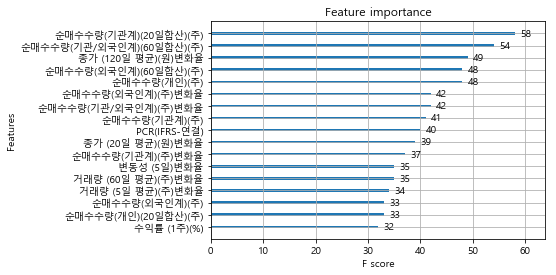

In [282]:
plot_importance(model)

In [30]:
col = ['변동성 (5일)_1일변화율',
 '순매수수량(외국인계)(20일합산)(주)_1일변화율',
 '순매수수량(기관계)(주)_1일변화율',
 '외국인보유비중(티커)(%)_1일변화율',
 '종가 (120일 평균)(원)_1일변화율',
 '거래량 (60일 평균)(주)_1일변화율',
 '순매수수량(기관/외국인계)(20일합산)(주)_1일변화율',
 '거래량 (5일 평균)(주)_1일변화율',
 '변동성 (5일)_2일변화율',
 '순매수수량(개인)(20일합산)(주)_2일변화율',
 '종가 (60일 평균)(원)_2일변화율',
 '거래량 (20일 평균)(주)_2일변화율',
 '순매수수량(외국인계)(60일합산)(주)_2일변화율',
 '외국인보유비중(티커)(%)_2일변화율',
 '순매수수량(개인)(60일합산)(주)_2일변화율',
 '순매수수량(기관계)(20일합산)(주)_2일변화율',
 '수익률 (1주)(%)_2일변화율',
 '순매수수량(기관/외국인계)(주)_2일변화율']

In [31]:
X_train = train[col]
X_test = test[col]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

In [ ]:
# max_depth=[3,4,5,6,7,8,9,10,11,12,13,14], learning_rate=[0.05, 0.1, 0.3, 0.5] n_estimators=[300,500,1000], gamma=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],
# min_child_weight=1, max_delta_step=0,subsample=[0.5,0.75,1],
# colsample_bytree=[0.6,0.7,0.8,0.9,1] colsample_bylevel=[0.6,0.7,0.8,0.9,1], reg_alpha=[0.01,0.1,0,1,10,100], reg_lambda=[0.01,0.1,1,10,100]

In [32]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [17]:
acc = []
pre = []
param = []
for i in [3,4]:
    for d in [0.5,1,2,3,4,5]:
        model = XGBClassifier(max_depth=i,
                              n_estimators = 1500,
                              min_child_weight=d)

        model.fit(X_train ,Y_train)
        a = model.predict(X_test)
        t = metrics.confusion_matrix(Y_test,a)

        acc.append(metrics.accuracy_score(a,Y_test))
        pre.append(t[1,1]/t[:,1].sum())
        param.append({"max_depth": i, "min_child_weight": d})



In [18]:
acc

[0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.65,
 0.6,
 0.6333333333333333,
 0.6666666666666666,
 0.5833333333333334,
 0.6333333333333333,
 0.6333333333333333,
 0.6,
 0.6,
 0.6,
 0.5833333333333334,
 0.6,
 0.5333333333333333,
 0.55,
 0.5833333333333334,
 0.6,
 0.5833333333333334,
 0.6,
 0.5,
 0.5666666666666667,
 0.5833333333333334,
 0.6,
 0.5666666666666667,
 0.5833333333333334]

In [19]:
accacc = []
pre = []
param = []
for i in [4,5,6]:
    for b in [0.05, 0.1, 0.2]:
        for c in [0,1,2,3,4]:
            for d in [0.5,1,2,3,4,5]:
                for j in [0.1,0,10]:
                    for k in [0.1,1,10]:  # 0 , 1 , 10 해야함
                        model = XGBClassifier(max_depth=i, 
                                              learning_rate=b,
                                              n_estimators = 1500,
                                              gamma = c,
                                              subsample=0.8,
                                              min_child_weight=d,
                                              colsample_bytree=0.8,
                                              reg_alpha=j,
                                              reg_lambda=k,
                                            )
                        
                        model.fit(X_train ,Y_train)
                        a = model.predict(X_test)
                        t = metrics.confusion_matrix(Y_test,a)

                        acc.append(metrics.accuracy_score(a,Y_test))
                        pre.append(t[1,1]/t[:,1].sum())
                        param.append({"max_depth": i, "learning_rate": b, "gamma" : c,
                                      'min_child_weight':d, 'reg_alpha':j, 'reg_lambda':k})
                        
                        

KeyboardInterrupt: 

In [24]:
max(pre)

0.75

In [47]:
X_train

변동성 (5일)_1일변화율  순매수수량(외국인계)(20일합산)(주)_1일변화율  순매수수량(기관계)(주)_1일변화율  외국인보유비중(티커)(%)_1일변화율  종가 (120일 평균)(원)_1일변화율  거래량 (60일 평균)(주)_1일변화율  순매수수량(기관/외국인계)(20일합산)(주)_1일변화율  거래량 (5일 평균)(주)_1일변화율  변동성 (5일)_2일변화율  순매수수량(개인)(20일합산)(주)_2일변화율  종가 (60일 평균)(원)_2일변화율  거래량 (20일 평균)(주)_2일변화율  순매수수량(외국인계)(60일합산)(주)_2일변화율  외국인보유비중(티커)(%)_2일변화율  순매수수량(개인)(60일합산)(주)_2일변화율  순매수수량(기관계)(20일합산)(주)_2일변화율  수익률 (1주)(%)_2일변화율  순매수수량(기관/외국인계)(주)_2일변화율
2013-06-05               0                            1                    0                     1                      1                      1                               0                     1               0                          0                     1                      1                            1                     1                          0                           0                  0                        1
2013-06-07               0                            0                    1                     0                      1                      0                               0                     0               0                          1                     1                      1                            1                     1                          0                           0                  1                        0
2013-06-10               1                            0                    0                     0                      1                      0                               0                     0               1                          1                     1                      0                            0                     0                          0                           1                  0                        0
2013-06-11               0                            1                    0                     1                      1                      0                               0                     1               1                          1                     1                      0                            1                     0                          1                           0                  0                        0
2013-06-12               0                            0                    1                     0                      1                      0                               0                     0               0                          1                     1                      0                            1                     0                          0                           0                  0                        1
2013-06-13               0                            0                    1                     0                      1                      1                               1                     0               0                          1                     1                      1                            0                     0                          1                           1                  0                        1
2013-06-14               0                            0                    0                     0                      1                      0                               1                     1               0                          0                     1                      1                            0                     0                          1                           1                  0                        1
2013-06-17               0                            0                    0                     1                      1                      0                               0                     1               0                          0                     1                      0                            0                     0                          1                           1                  1                        0
2013-06-18               0                            0                    0   

In [45]:
X_train

변동성 (5일)_1일변화율  순매수수량(외국인계)(20일합산)(주)_1일변화율  순매수수량(기관계)(주)_1일변화율  외국인보유비중(티커)(%)_1일변화율  종가 (120일 평균)(원)_1일변화율  거래량 (60일 평균)(주)_1일변화율  순매수수량(기관/외국인계)(20일합산)(주)_1일변화율  거래량 (5일 평균)(주)_1일변화율  변동성 (5일)_2일변화율  순매수수량(개인)(20일합산)(주)_2일변화율  종가 (60일 평균)(원)_2일변화율  거래량 (20일 평균)(주)_2일변화율  순매수수량(외국인계)(60일합산)(주)_2일변화율  외국인보유비중(티커)(%)_2일변화율  순매수수량(개인)(60일합산)(주)_2일변화율  순매수수량(기관계)(20일합산)(주)_2일변화율  수익률 (1주)(%)_2일변화율  순매수수량(기관/외국인계)(주)_2일변화율
2013-06-05               0                            1                    0                     1                      1                      1                               0                     1               0                          0                     1                      1                            1                     1                          0                           0                  0                        1
2013-06-07               0                            0                    1                     0                      1                      0                               0                     0               0                          1                     1                      1                            1                     1                          0                           0                  1                        0
2013-06-10               1                            0                    0                     0                      1                      0                               0                     0               1                          1                     1                      0                            0                     0                          0                           1                  0                        0
2013-06-11               0                            1                    0                     1                      1                      0                               0                     1               1                          1                     1                      0                            1                     0                          1                           0                  0                        0
2013-06-12               0                            0                    1                     0                      1                      0                               0                     0               0                          1                     1                      0                            1                     0                          0                           0                  0                        1
2013-06-13               0                            0                    1                     0                      1                      1                               1                     0               0                          1                     1                      1                            0                     0                          1                           1                  0                        1
2013-06-14               0                            0                    0                     0                      1                      0                               1                     1               0                          0                     1                      1                            0                     0                          1                           1                  0                        1
2013-06-17               0                            0                    0                     1                      1                      0                               0                     1               0                          0                     1                      0                            0                     0                          1                           1                  1                        0
2013-06-18               0                            0                    0   

In [43]:
Y_train

2013-06-05    1
2013-06-07    0
2013-06-10    0
2013-06-11    0
2013-06-12    0
2013-06-13    0
2013-06-14    1
2013-06-17    0
2013-06-18    1
2013-06-19    0
2013-06-20    0
2013-06-21    0
2013-06-24    1
2013-06-25    1
2013-06-26    0
2013-06-27    1
2013-06-28    1
2013-07-01    1
2013-07-02    0
2013-07-03    0
2013-07-04    1
2013-07-05    1
2013-07-08    0
2013-07-09    0
2013-07-10    1
2013-07-11    0
2013-07-12    1
2013-07-15    0
2013-07-16    1
2013-07-17    0
             ..
2018-08-14    1
2018-08-16    1
2018-08-17    1
2018-08-20    0
2018-08-21    0
2018-08-22    1
2018-08-23    0
2018-08-24    0
2018-08-27    1
2018-08-28    0
2018-08-29    1
2018-08-30    0
2018-08-31    1
2018-09-03    1
2018-09-04    0
2018-09-05    1
2018-09-06    0
2018-09-07    1
2018-09-10    0
2018-09-11    1
2018-09-12    0
2018-09-13    1
2018-09-14    0
2018-09-17    0
2018-09-18    0
2018-09-19    1
2018-09-20    1
2018-09-21    1
2018-09-27    1
2018-09-28    0
Name: 수익률(%)(2), Length:

## Back testing

In [19]:
backtestdata = pd.read_excel('./Final_testdataset.xlsx')

In [20]:
backtestdata

순매수수량(외국인계)(20일합산)(주)  외국인보유비중(티커)(%)  외국인보유비중(티커)(%)변화율  변동성 (5일)  순매수수량(외국인계)(60일합산)(주)  PCR(IFRS-연결)변화율  PBR(IFRS-연결)  순매수수량(기관/외국인계)(주)  PER(IFRS-연결)변화율  거래량 (5일 평균)(주)    ...      PBR(IFRS-연결)변화율  순매수수량(기관/외국인계)(주)변화율  순매수수량(기관/외국인계)(20일합산)(주)  종가 (60일 평균)(원)  순매수수량(개인)(20일합산)(주)변화율  수익률 (1주)(%)변화율  순매수수량(개인)(주)변화율  순매수수량(기관계)(주)  Name  수익률(%)(2)
2018-12-28                      1               0                  1         1                      0                1             0                  0                1               1    ...                    1                     1                         0               0                       0               1                0              0   코웨이          1
2019-01-02                      1               1                  1         0                      1                1             1                  1                1               0    ...                    1                     0                         0               0                       1               1                1              0   코웨이          1
2019-01-03                      1               1                  1         0                      1                1             1                  1                1               0    ...                    1                     1                         1               0                       0               1                0              1   코웨이          1
2019-01-04                      1               1                  1         1                      1                1             1                  1                1               0    ...                    1                     1                         1               0                       0               1                0              1   코웨이          0
2019-01-07                      1               1                  0         1                      1                0             0                  0                0               0    ...                    0                     0                         0               0                       1               0                1              0   코웨이          1
2019-01-09                      1               1                  1         1                      1                1             0                  1                1               0    ...                    1                     1                         0               0                       0               1                0              0   코웨이          0
2019-01-10                      1               1                  0         1                      1                0             1                  1                0               0    ...                    0                     0                         0               0                       1               0                1              1   코웨이          1
2019-01-11                      1               0                  1         0                      1                1             1                  1                1               1    ...                    1                     1                         0               0                       0               0                0              1   코웨이          1
2019-01-14                      1               0                  0         0                      1                0             1                  1                0               1    ...                    0                     0                         1               0                       1               1                1              1   코웨이          0
2019-01-15                      1               0                  0         0                      0                0             0                  0                0               1    ...                    0                     0                         0               0                       1               0                1              1   코

In [46]:
colsss = ['PCR(IFRS-연결)',
 '거래량 (5일 평균)(주)변화율',
 '거래량 (60일 평균)(주)변화율',
 '변동성 (5일)변화율',
 '수익률 (1주)(%)',
 '순매수수량(개인)(20일합산)(주)',
 '순매수수량(개인)(주)',
 '순매수수량(기관/외국인계)(60일합산)(주)',
 '순매수수량(기관/외국인계)(주)변화율',
 '순매수수량(기관계)(20일합산)(주)',
 '순매수수량(기관계)(주)',
 '순매수수량(기관계)(주)변화율',
 '순매수수량(외국인계)(60일합산)(주)',
 '순매수수량(외국인계)(주)',
 '순매수수량(외국인계)(주)변화율',
 '종가 (120일 평균)(원)변화율',
 '종가 (20일 평균)(원)변화율']

X_train = train[colsss]
X_test = backtestdata[colsss]

Y_train = train['수익률(%)(2)']
Y_test = backtestdata['수익률(%)(2)']

model = XGBClassifier(colsample_bytree=0.8, gamma=0, learning_rate = 0.2, max_depth = 5, min_child_weight=0.5,n_estimators = 4000,
                      reg_alpha=0.1, reg_lambda=1, subsample = 0.5 )
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('acc: {y:.5}, pre:{g:.5}'.format(y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ),'\n',
                                                   metrics.confusion_matrix(Y_test,b))

acc: 0.73684, pre:0.88889 
 [[6 1]
 [4 8]]


In [18]:
train

순매수수량(외국인계)(20일합산)(주)  외국인보유비중(티커)(%)  외국인보유비중(티커)(%)변화율  변동성 (5일)  순매수수량(외국인계)(60일합산)(주)  PCR(IFRS-연결)변화율  PBR(IFRS-연결)  순매수수량(기관/외국인계)(주)  PER(IFRS-연결)변화율  거래량 (5일 평균)(주)    ...      PBR(IFRS-연결)변화율  순매수수량(기관/외국인계)(주)변화율  순매수수량(기관/외국인계)(20일합산)(주)  종가 (60일 평균)(원)  순매수수량(개인)(20일합산)(주)변화율  수익률 (1주)(%)변화율  순매수수량(개인)(주)변화율  순매수수량(기관계)(주)  Name  수익률(%)(2)
2013-06-07                      1               1                  0         0                      1                1             1                  0                1               1    ...                    1                     0                         0               1                       1               1                1              1   코웨이          0
2013-06-10                      0               0                  0         1                      0                0             0                  0                0               0    ...                    0                     0                         0               1                       1               0                1              1   코웨이          1
2013-06-11                      1               0                  1         1                      1                0             0                  0                0               0    ...                    0                     1                         0               1                       1               0                0              0   코웨이          0
2013-06-12                      0               0                  0         0                      1                0             0                  1                0               0    ...                    0                     0                         0               1                       1               0                1              0   코웨이          1
2013-06-13                      0               0                  0         0                      0                0             0                  1                0               0    ...                    0                     1                         0               1                       0               0                0              1   코웨이          1
2013-06-14                      0               0                  0         0                      0                0             0                  1                0               1    ...                    0                     0                         1               1                       0               0                1              1   코웨이          1
2013-06-17                      0               0                  1         0                      0                1             1                  0                1               1    ...                    1                     1                         1               1                       1               1                0              0   코웨이          0
2013-06-18                      0               1                  1         0                      0                0             0                  0                0               1    ...                    0                     0                         0               1                       1               0                1              0   코웨이          1
2013-06-19                      0               1                  1         0                      0                1             1                  1                1               1    ...                    1                     1                         0               1                       0               1                0              0   코웨이          0
2013-06-20                      1               1                  0         1                      1                0             0                  1                0               0    ...                    0                     0                         1               1                       1               0                1              1   코

In [53]:
# 0.8	0	0.1	4	0.5	0	10	0.5
# 0.8	0	0.1	4	0.5	0.1	1	0.5

b

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0]

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0]



In [45]:
Y_test

2018-12-28    1
2019-01-02    1
2019-01-03    1
2019-01-04    0
2019-01-07    1
2019-01-09    0
2019-01-10    1
2019-01-11    1
2019-01-14    0
2019-01-15    0
2019-01-16    1
2019-01-18    1
2019-01-21    0
2019-01-22    1
2019-01-23    0
2019-01-24    0
2019-01-25    1
2019-01-28    1
2019-01-29    1
Name: 수익률(%)(2), dtype: int64

In [46]:
X_train

PCR(IFRS-연결)  거래량 (5일 평균)(주)변화율  거래량 (60일 평균)(주)변화율  변동성 (5일)변화율  수익률 (1주)(%)  순매수수량(개인)(20일합산)(주)  순매수수량(개인)(주)  순매수수량(기관/외국인계)(60일합산)(주)  순매수수량(기관/외국인계)(주)변화율  순매수수량(기관계)(20일합산)(주)  순매수수량(기관계)(주)  순매수수량(기관계)(주)변화율  순매수수량(외국인계)(60일합산)(주)  순매수수량(외국인계)(주)  순매수수량(외국인계)(주)변화율  종가 (120일 평균)(원)변화율  종가 (20일 평균)(원)변화율
2013-06-07             1                  0                   0            0            1                    1             1                         1                     0                     0              1                 1                      1               0                  0                   1                  1
2013-06-10             0                  0                   0            1            0                    1             1                         1                     0                     1              1                 0                      0               0                  0                   1                  1
2013-06-11             0                  1                   0            0            0                    1             1                         0                     1                     0              0                 0                      1               1                  1                   1                  1
2013-06-12             0                  0                   0            0            0                    1             0                         1                     0                     0              0                 1                      1               1                  0                   1                  0
2013-06-13             0                  0                   1            0            0                    1             0                         0                     1                     1              1                 1                      0               0                  0                   1                  0
2013-06-14             0                  1                   0            0            0                    0             0                         0                     0                     1              1                 0                      0               0                  1                   1                  0
2013-06-17             1                  1                   0            0            1                    0             1                         0                     1                     1              0                 0                      0               1                  1                   1                  0
2013-06-18             0                  1                   0            0            1                    1             1                         0                     0                     1              0                 0                      0               1                  0                   1                  0
2013-06-19             1                  1                   0            0            1                    1             0                         0                     1                     1              0                 0                      0               1                  1                   1                  0
2013-06-20             0                  0                   0            1            0                    0             0                         0                     0                     1              1                 1                      1               0                  0                   1                  0
2013-06-21             0                  0                   0            0            0                    1             1                         0                     1                     1              1                 0                      0               0                  1                   1                  0
2013-06-24             0                  0                   0            1            0                    0  